In [6]:
# To import data csv from Computer to Jupyter Notebook

import pandas as pd

import matplotlib.pyplot as plt

pd.set_option('display.max_rows',None)

pd.set_option('display.max_columns',None)

pd.set_option('display.width',None)

df = pd.read_csv('/Users/jeffrygunawan/Library/Mobile Documents/com~apple~CloudDocs/JEFFRY/Data Analysis/Kaggel Data Set/Video Game Sales/1. Data Excel Yang Sudah Clean/vgsales.csv')

df.head(10)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [7]:
# To check total Rows and Columns

df.shape

(16598, 11)

In [9]:
# To check data type of every Column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
# To check Nan or NULL

df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [17]:
# Erase rows with value NaN or null
df_cleaned = df.dropna()

# show DataFrame after erase NaN
df_cleaned.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [18]:
# Hitung total penjualan global untuk setiap genre menggunakan Pandas di Python.

genre_total_sales = df_cleaned.groupby('Genre')['Global_Sales'].sum().reset_index()

# Menampilkan data genre_total_sales
genre_total_sales.head(10)

,Genre,Global_Sales
0,Action,1722.84
1,Adventure,234.59
2,Fighting,444.05
3,Misc,789.87
4,Platform,829.13
5,Puzzle,242.21
6,Racing,726.76
7,Role-Playing,923.83
8,Shooter,1026.20
9,Simulation,389.98


In [23]:
# Gunakan Pandas untuk menganalisis tren penjualan game pada dekade terakhir (2010-2019).

# Filter data untuk tahun 2010 hingga 2019
df_last_decade = df_cleaned[(df_cleaned['Year'] >= 2010) & (df_cleaned['Year'] < 2020)]

# Hitung total penjualan global per tahun pada dekade terakhir
sales_last_decade = df_last_decade.groupby('Year')['Global_Sales'].sum().reset_index()

# Tampilkan hasil
sales_last_decade.head(10)


,Year,Global_Sales
0,2010,600.29
1,2011,515.80
2,2012,363.49
3,2013,368.11
4,2014,337.03
5,2015,264.44
6,2016,70.90
7,2017,0.05


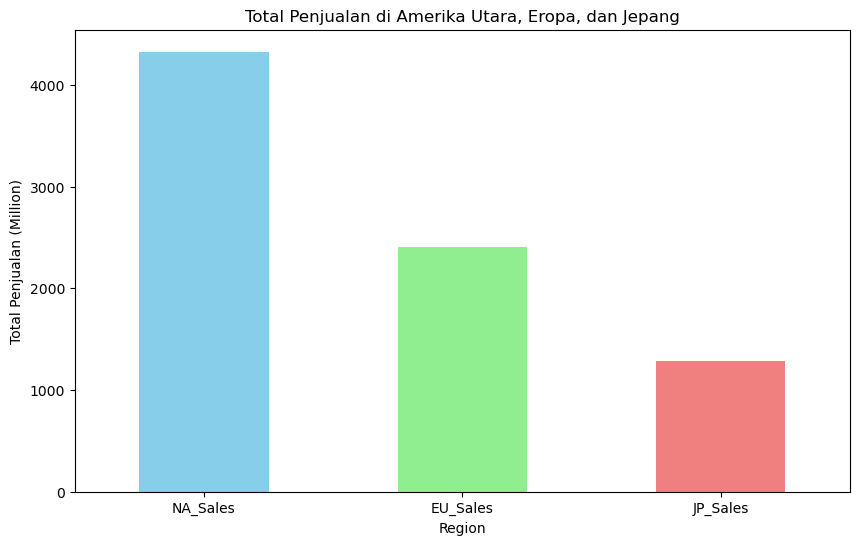

In [58]:
# Buat visualisasi menggunakan Matplotlib membandingkan total penjualan di Amerika Utara, Eropa, dan Jepang.

import matplotlib.pyplot as plt

# Filter data untuk kolom yang diperlukan
sales_by_region = df_cleaned[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()

# Plot grafik batang
plt.figure(figsize=(10, 6))
sales_by_region.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Total Penjualan di Amerika Utara, Eropa, dan Jepang')
plt.xlabel('Region')
plt.ylabel('Total Penjualan (Million)')
plt.xticks(rotation=0)
plt.show()


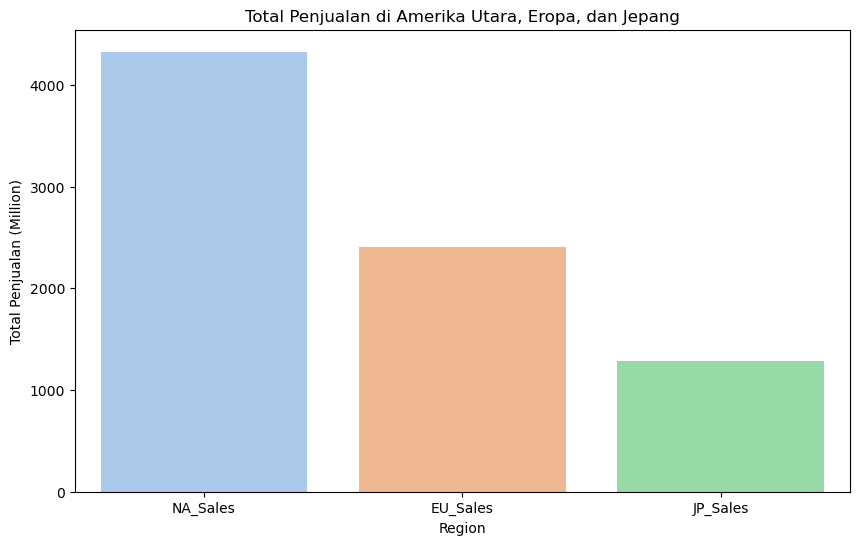

In [59]:
# Buat visualisasi menggunakan Seaborn yang membandingkan total penjualan di Amerika Utara, Eropa, dan Jepang.

import seaborn as sns

# Filter data untuk kolom yang diperlukan
sales_by_region = df_cleaned[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()

# Plot grafik batang dengan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette='pastel')
plt.title('Total Penjualan di Amerika Utara, Eropa, dan Jepang')
plt.xlabel('Region')
plt.ylabel('Total Penjualan (Million)')
plt.show()


In [74]:
# Analisis total penjualan global pada tahun tertentu menggunakan Pandas.

df_cleaned.groupby('Year')[['Global_Sales']].sum().reset_index()


,Year,EU_Sales
0,1980,0.67
1,1981,1.96
2,1982,1.65
3,1983,0.80
4,1984,2.10
5,1985,4.74
6,1986,2.84
7,1987,1.41
8,1988,6.59
9,1989,8.44


In [76]:
# Analisis total penjualan global pada tahun tertentu menggunakan Pandas.

df_cleaned.groupby('Year')[['EU_Sales', 'Global_Sales']].sum().reset_index()

,Year,EU_Sales,Global_Sales
0,1980,0.67,11.38
1,1981,1.96,35.77
2,1982,1.65,28.86
3,1983,0.80,16.79
4,1984,2.10,50.36
5,1985,4.74,53.94
6,1986,2.84,37.07
7,1987,1.41,21.74
8,1988,6.59,47.22
9,1989,8.44,73.45


In [77]:
# Analisis total penjualan global pada tahun tertentu menggunakan Pandas.

df_cleaned.groupby('Year')[['EU_Sales','NA_Sales','JP_Sales','Other_Sales', 'Global_Sales']].sum().reset_index()

,Year,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,0.67,10.59,0.00,0.12,11.38
1,1981,1.96,33.40,0.00,0.32,35.77
2,1982,1.65,26.92,0.00,0.31,28.86
3,1983,0.80,7.76,8.10,0.14,16.79
4,1984,2.10,33.28,14.27,0.70,50.36
5,1985,4.74,33.73,14.56,0.92,53.94
6,1986,2.84,12.50,19.81,1.93,37.07
7,1987,1.41,8.46,11.63,0.20,21.74
8,1988,6.59,23.87,15.76,0.99,47.22
9,1989,8.44,45.15,18.36,1.50,73.45


In [80]:
# Analisis total penjualan global pada tahun tertentu menggunakan Pandas dengan syarat Year > 2000

df_cleaned[df_cleaned['Year'] > 2000].groupby('Year')[['EU_Sales','NA_Sales','JP_Sales','Other_Sales', 'Global_Sales']].sum().reset_index()

,Year,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales
0,2001,94.89,173.98,39.86,22.76,331.47
1,2002,109.74,216.19,41.76,27.28,395.52
2,2003,103.81,193.59,34.20,26.01,357.85
3,2004,105.92,218.80,41.65,47.24,414.01
4,2005,121.56,241.58,54.28,40.55,458.51
5,2006,129.24,263.12,73.73,54.43,521.04
6,2007,160.18,311.18,60.29,77.58,609.92
7,2008,184.40,351.44,60.26,82.39,678.90
8,2009,191.59,338.85,61.89,74.77,667.30
9,2010,176.57,304.24,59.49,59.90,600.29


In [90]:
# Temukan publisher dengan total penjualan tertinggi menggunakan Pandas di Python.

df_cleaned.groupby('Publisher')[['Global_Sales']].sum().reset_index().sort_values(by='Global_Sales', ascending=False)

,Publisher,Global_Sales
359,Nintendo,1784.43
138,Electronic Arts,1093.39
21,Activision,721.41
455,Sony Computer Entertainment,607.28
524,Ubisoft,473.54
493,Take-Two Interactive,399.30
487,THQ,340.44
275,Konami Digital Entertainment,278.56
445,Sega,270.70
347,Namco Bandai Games,253.65


In [91]:
# Temukan publisher dengan total penjualan tertinggi menggunakan Pandas di Python.

df_cleaned.groupby('Publisher')[['Global_Sales']].sum().reset_index().sort_values(by='Global_Sales', ascending=False).head(1)

,Publisher,Global_Sales
359,Nintendo,1784.43


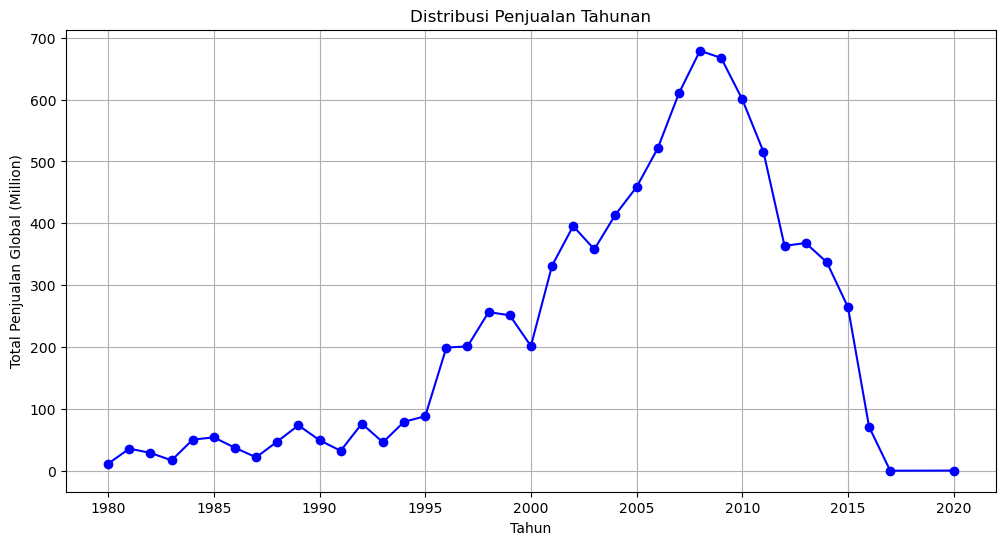

In [97]:
# Buat visualisasi menggunakan Pandas dan Matplotlib yang menunjukkan distribusi penjualan tahunan.

import pandas as pd
import matplotlib.pyplot as plt


# Group by Year and sum Global_Sales
sales_by_year = df_cleaned.groupby('Year')['Global_Sales'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(sales_by_year['Year'], sales_by_year['Global_Sales'], marker='o', linestyle='-', color='b')
plt.title('Distribusi Penjualan Tahunan')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan Global (Million)')
plt.grid(True)
plt.show()


In [104]:
# Analisis platform yang paling populer untuk setiap genre menggunakan Pandas.

df_cleaned.groupby(['Platform','Genre'])[['Name']].count().reset_index().sort_values(by='Name', ascending=False)

,Platform,Genre,Name
151,PS2,Sports,391
37,DS,Misc,389
153,PS3,Action,373
141,PS2,Action,345
34,DS,Action,335
258,X360,Action,318
43,DS,Simulation,280
237,Wii,Misc,272
244,Wii,Sports,256
35,DS,Adventure,238


In [107]:
result = df_cleaned.groupby(['Platform', 'Genre'])[['Name']].count().reset_index().sort_values(by='Name', ascending=False)

# Ganti nama kolom 'Name' menjadi 'Total Penjualan'
result = result.rename(columns={'Name': 'Total Penjualan'})

result.head(1)

,Platform,Genre,Total Penjualan
151,PS2,Sports,391
